# THE SPARKS FOUNDATION

# Author: ANUPAM RANA

# Task 2: Prediction using Unupervised ML

This task is based on unsupervised learing in which I have used elbow method. The Elbow method is a very popular technique in which the idea is to run k-means clustering for a range of 'k' clusters and for each value, we are calculating the sum of squared distances from each point to its assigned center(distortions).

Objective- To predict the optimum number of cluster from the given iris dataser using K-Means and to visualise the clusters formed.

Dataset Used: https://bit.ly/3kXTdox

# Importing all the required libraries:

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Reading data from link:

In [37]:
df = pd.read_csv('Iris.csv')
print("Data imported successfully!")

Data imported successfully!


# Analyzing the data:

In [38]:
df.head()            #gives first 5 values in the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
df.tail()            #gives last 5 values in the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [40]:
df.shape              #to check the shape of the dataset

(150, 6)

In [41]:
df.isnull().sum()  #to check number of null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [42]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

This shows that the Iris dataset does not contain any null values.

In [43]:
df.corr()        #to check correlation

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [44]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [56]:
x = df.iloc[ : , 1:5].values             #defining values of x

X = pd.DataFrame({'Sepal_Length' : x[0],'Sepal_Width' : x[1], 'Petal_Length' : x[2],'Petal_Width' : x[3]})
X

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,4.9,4.7,4.6
1,3.5,3.0,3.2,3.1
2,1.4,1.4,1.3,1.5
3,0.2,0.2,0.2,0.2


# Performing The Elbow Method:

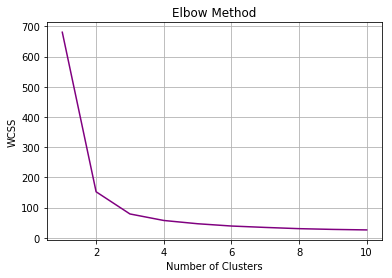

In [65]:
wcss = [] 
for i in range(1,11) : 
  kmeans = KMeans(n_clusters = i , init = 'k-means++' ,random_state = 1)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_) 

plt.plot(range(1,11),wcss,color = 'purple')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

From the above plot, it is clear that the dataset has 3 clusters.
Now we will visualize the elbow as it's bending at k = 3.

# Training K-Means Model:

In [66]:
kmeans = KMeans(n_clusters = 3 , init = 'k-means++' , random_state = 1)
y_kmeans = kmeans.fit_predict(x)

print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# Visualizing the K-Means Model:

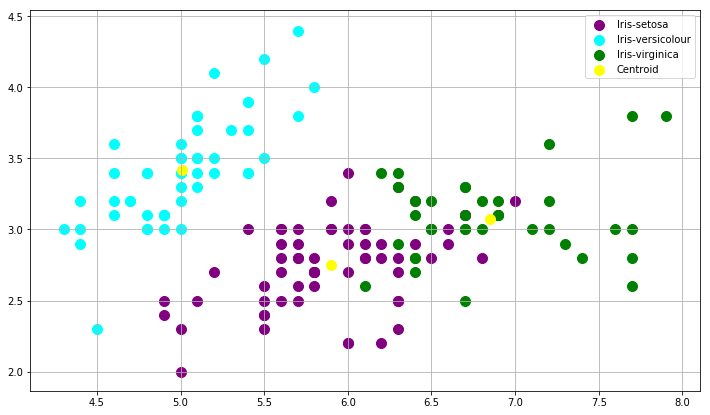

In [68]:
plt.figure(figsize = [12,7])
plt.scatter(x[y_kmeans == 0 , 0] , x[y_kmeans == 0 , 1], s = 100 , color = 'purple' , label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1 , 0] , x[y_kmeans == 1 , 1], s = 100 , color = 'cyan' , label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2 , 0] , x[y_kmeans == 2 , 1], s = 100 , color = 'green' , label = 'Iris-virginica')


plt.scatter(kmeans.cluster_centers_[ : ,0], kmeans.cluster_centers_[ : , 1], s = 100 , color = 'yellow' , label = 'Centroid')      #Plotting Centroid

plt.grid(True)
plt.legend()

From the above plot, it's clearly visible that Iris-Setosa and Iris-Virginica are more accurate in the standardized training model.